<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%83%9D%EC%84%A0%EA%B8%B8%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오1 : 생선길이학습

## 데이터 분석

In [4]:
#도미(Sea bream): 35마리
#길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

#무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

특성 : 데이터의 특징
- 첫번째 도미의 특성 : 길이_25.4cm, 무게_242.0g
- 두번째 도미의 특성 : 길이_26.3cm, 무게_290.0g

    ... 등

두 특성비교 : 숫자비교 보다 그래프표현이 좋음

길이 : x축, 무게 : y축 -> 산점도(두좌표의 관계)

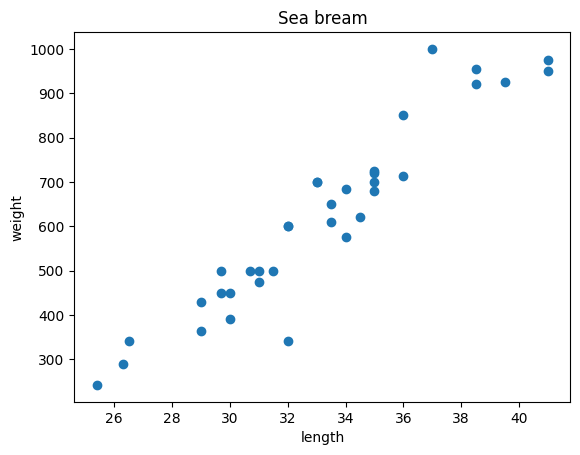

In [7]:
# 도미 35마리의 차원 점그래프로 표현
import matplotlib.pyplot as plt #파이썬에서 과학 계산용 그래프를 그리는 대표적인 패키지
plt.scatter(bream_length, bream_weight) #길이 : x축, 무게 : y축_차트의 값 넣음
plt.title("Sea bream")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

#결론 : 생선의 길이가 길수록 무게가 많이 나간다. -> 선형적 => 26cm이상

In [8]:
# 빙어 데이터(Pond smelt) : 14마리
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

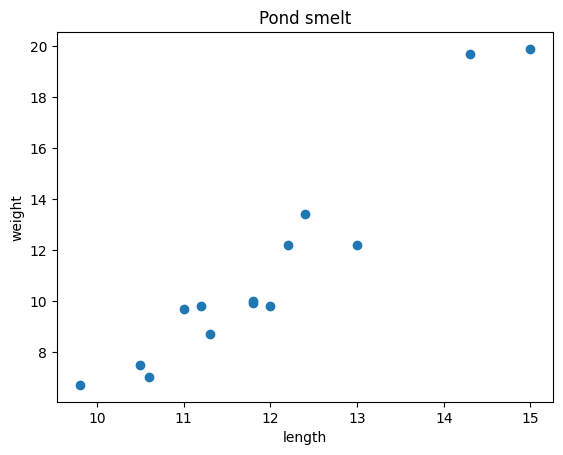

In [9]:
plt.scatter(smelt_length, smelt_weight) #길이 : x축, 무게 : y축_차트의 값 넣음
plt.title("Pond smelt")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

#결론 : 생선의 길이가 길수록 무게가 많이 나간다. -> 선형적 => 빙어는 15cm 이하

## AI 학습용

### 전처리

2개의 리스트를 합쳐서 AI 학습용 자료생성

ai 트레이닝 : 사이킷런이용

- 입력 : 2차원 리스트로만


In [19]:
#35 + 14 => 49 마리
length = bream_length + smelt_length #도미길이 + 빙어길이
weight = bream_weight + smelt_weight #도미무게 + 빙어무게

In [20]:
#zip() : 나열된 리스트 각각에서 하나씩 원소를 추출및 반환
fish_date = [[l,w] for l,w in zip(length, weight)]
print(fish_date) #사이킷런 : 2차원리스트

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 정답데이터 입력(target)

생선 49개에 대한 정답리스트 입력(도미 : 35마리, 빙어 : 14마리)

머신러닝에서는 정답 데이터를 2진분류로 테스트(1 : 도미, 2 : 빙어)

In [21]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 트레이닝(훈련)

In [22]:
#사이킷런패지키.이웃패키지  KNeighborsClassifier(k-최근접 이웃 알고리즘 : 클래스)
#파이참의 경우, 아나콘다(미니콘다)에서 설치 사용가능
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() #import된 객체를 생성하여 변수에 연결:자바의 new

In [23]:
#전치리데이터(fish_date), 정답데이터(fish_target)을 전달 후 도미를 찾는 기준 학습 : fit()
kn.fit(fish_date, fish_target)

KNeighborsClassifier()

### 훈련 평가

In [24]:
#객체(kn)의 훈련평가 : score()
kn.score(fish_date, fish_target)
#결과 : 1.0 (100%) : 정확도

1.0

## k-최근접 이웃 알고리즘 파악

어떤 데이터에 대한 답을 구할 때, 주위의 다른 데이터를 보고 다수를 차지하는 것(근접한 데이터)을 정답으로 출력
- 데이터를 모두 가지고 있을 것(많을수록 좋음)
- 새로운 데이터에 대해 예측할때 : 가장 가까운 직선거리의 데이터
- 단점 : 데이터가 너무 많으면 사용하기 어려움

    메모리가 많이 필요

    직선거리계산시간 오래걸림
- 데이터를 메모리에 담고 활용(객체생성) : 일회용 => 훈련결과 파일이 존재x
- 새로운 데이터가 들어오면, 가장 가까운 데이터를 메모리에서 참고하여 2진법으로 구분

In [25]:
#새로운 데이터의 정답을 예측 : predict
kn.predict([[30,600]])  #길이 : 30cm, 무게 : 600g
#결론 : 1(도미)

array([1])

In [26]:
# 전처리데이터
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [27]:
#정답데이터
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
kn.predict([[5,15]])

array([0])

### n_neighbors

In [29]:
#참고데이터 수 지정 : n_neighbors = ??? (기본값 : 5개)
kn49= KNeighborsClassifier(n_neighbors =49)
#참고데이터를 49개로 한 모델 kn49변수

kn49.fit(fish_date, fish_target)
kn49.score(fish_date, fish_target)
#결론 : 0.71428 => 약 71% : 좋지 않음

0.7142857142857143